In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Data Setup
nyc_data = {
    'Year': [1895, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    'Avg_High_Temp': [34.2, 32.1, 30.5, 31.0, 33.5, 34.1, 35.2, 34.9, 32.0, 33.4, 34.8, 36.2, 37.1, 39.5]
}
nyc_df = pd.DataFrame(nyc_data)


In [3]:
nyc_df.head()
nyc_df.tail()


,Year,Avg_High_Temp
9,1980,33.4
10,1990,34.8
11,2000,36.2
12,2010,37.1
13,2020,39.5


In [4]:
pd.set_option('display.precision', 2)
nyc_df['Avg_High_Temp'].describe()


count    14.00
mean     34.18
std       2.43
min      30.50
25%      32.42
50%      34.15
75%      35.12
max      39.50
Name: Avg_High_Temp, dtype: float64

In [5]:
# Linear regression with SciPy
x = nyc_df['Year']
y = nyc_df['Avg_High_Temp']
result = stats.linregress(x, y)
slope, intercept = result.slope, result.intercept


In [6]:
future_year = 2024
prediction_2024 = slope * future_year + intercept
print(f"Part 2 - Predicted 2024 temperature: {prediction_2024:.2f}°F")


Part 2 - Predicted 2024 temperature: 37.20°F


In [7]:
# Prepare data and split into training/testing
X = nyc_df[['Year']]
y = nyc_df['Avg_High_Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
future_year = np.array([[2024]])
prediction_ml = model.predict(future_year)[0]
print(f"Part 3 - Predicted 2024 temperature (ML): {prediction_ml:.2f}°F")


Part 3 - Predicted 2024 temperature (ML): 37.48°F


/Users/brandonj/Documents/datafun-07-ml/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


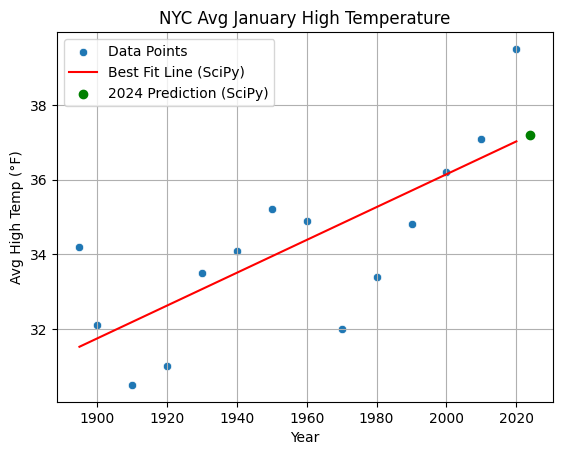

In [9]:
# Scatter plot and linear regression line
sns.scatterplot(x='Year', y='Avg_High_Temp', data=nyc_df, label="Data Points")
plt.plot(nyc_df['Year'], slope * nyc_df['Year'] + intercept, color='red', label="Best Fit Line (SciPy)")
plt.scatter(2024, prediction_2024, color='green', label="2024 Prediction (SciPy)")
plt.title("NYC Avg January High Temperature")
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")
plt.legend()
plt.grid()
plt.show()
